In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


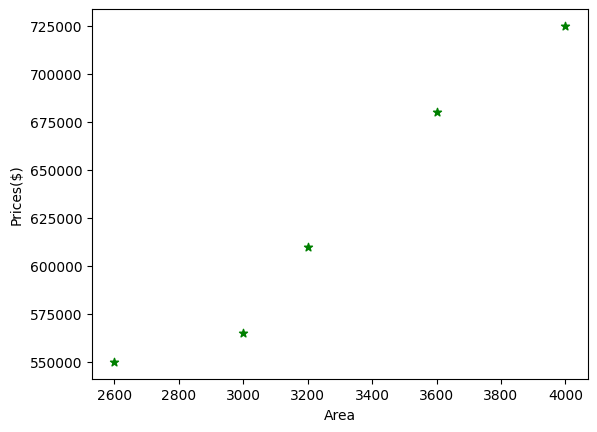

In [6]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Prices($)')
plt.scatter(df.area,df.price,color='green',marker='*')

In [7]:
new_df = df.drop('price',axis=1)
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [8]:
prices = pd.DataFrame(df['price'])
prices

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [9]:
reg = LinearRegression()

In [10]:
reg.fit(new_df,prices)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
new_data = pd.read_csv('areas.csv')
new_data.head(4)

,area
0,1000
1,1500
2,2300
3,3540


In [12]:
price_of_new_data = reg.predict(new_data)

In [13]:
price_of_new_data = pd.DataFrame(price_of_new_data)
price_of_new_data

,0
0,3.164041e+05
1,3.842979e+05
2,4.929281e+05
3,6.613048e+05
4,7.400616e+05
5,7.998082e+05
6,9.260908e+05
7,6.504418e+05
8,8.256079e+05
9,4.929281e+05


In [14]:
new_data['Prices'] = price_of_new_data
new_data.head(4)

,area,Prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521


In [15]:
new_data.to_csv('prediction.csv',index=False)

In [16]:
m = reg.coef_

In [17]:
m

array([[135.78767123]])

In [18]:
b = reg.intercept_

In [19]:
b

array([180616.43835616])

In [20]:
reg.predict([[2334]])

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[497544.8630137]])

In [21]:
answer = m*2334 + b
answer

array([[497544.8630137]])

In [22]:
import pickle

In [23]:
with open('model_with_pickel','wb') as f:
    pickle.dump(reg,f)

In [24]:
with open('model_with_pickel','rb') as f:
    ans = pickle.load(f)

In [26]:
ans.predict([[5000]])

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[859554.79452055]])

In [28]:
import joblib

In [29]:
joblib.dump(reg,'model_joblib_save')

['model_joblib_save']

In [30]:
mj = joblib.load('model_joblib_save')

In [32]:
mj.predict([[5000]])

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[859554.79452055]])